# ***Project # 1***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("PS4_GamesSales.csv", encoding="latin-1")
df

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
...,...,...,...,...,...,...,...,...,...
1029,Fallen Legion: Flames of Rebellion,NaN,Role-Playing,NaN,0.00,0.00,0.00,0.00,0.00
1030,Radial G Racing Revolved,2017.0,Racing,Tammeka Games,0.00,0.00,0.00,0.00,0.00
1031,The Mummy Demastered,NaN,Action,NaN,0.00,0.00,0.00,0.00,0.00
1032,Project Nimbus: Code Mirai,NaN,Action,NaN,0.00,0.00,0.00,0.00,0.00


# ***Data Cleaning***

In [20]:
df.shape

(1034, 9)

In [11]:
df.isnull().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

In [13]:
df["Year"].unique()

array([2014., 2015., 2018., 2017., 2016., 2013.,   nan, 2019., 2020.])

In [23]:
df["Publisher"] = df["Publisher"].fillna("unknown")
df["Publisher"]

0       Rockstar Games
1           Activision
2       Rockstar Games
3           Activision
4            EA Sports
             ...      
1029           unknown
1030     Tammeka Games
1031           unknown
1032           unknown
1033           unknown
Name: Publisher, Length: 1034, dtype: object

In [27]:
df["Year"] = df["Year"].fillna("unknown")
df["Year"]

0        2014.0
1        2015.0
2        2018.0
3        2017.0
4        2017.0
         ...   
1029    unknown
1030     2017.0
1031    unknown
1032    unknown
1033    unknown
Name: Year, Length: 1034, dtype: object

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Game           1034 non-null   object 
 1   Year           1034 non-null   object 
 2   Genre          1034 non-null   object 
 3   Publisher      1034 non-null   object 
 4   North America  1034 non-null   float64
 5   Europe         1034 non-null   float64
 6   Japan          1034 non-null   float64
 7   Rest of World  1034 non-null   float64
 8   Global         1034 non-null   float64
dtypes: float64(5), object(4)
memory usage: 72.8+ KB


In [29]:
df.isnull().sum()

Game             0
Year             0
Genre            0
Publisher        0
North America    0
Europe           0
Japan            0
Rest of World    0
Global           0
dtype: int64

In [30]:
df.column

Index(['Game', 'Year', 'Genre', 'Publisher', 'North America', 'Europe',
       'Japan', 'Rest of World', 'Global'],
      dtype='object')

# ***EDA***

# Identify the top 5 best-selling games globally

In [52]:
top_games = df.sort_values(by="Global", ascending = False).head(5)
top_games

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [53]:
print(top_games[['Game','Global']])

                        Game  Global
0         Grand Theft Auto V   19.39
1  Call of Duty: Black Ops 3   15.09
2      Red Dead Redemption 2   13.94
3         Call of Duty: WWII   13.40
4                    FIFA 18   11.80


In [56]:
print("""Here insights from the output:

1) Grand Theft Auto V is the best-selling game globally, with 19.39 million units sold.
2) The Call of Duty series is very popular, with two games in the top 5:
  --> Black Ops 3 sold 15.09 million units.
  --> WWII sold 13.40 million units.
3) Red Dead Redemption 2 is also a big hit, selling 13.94 million units.
4) FIFA 18 shows how loved football games are, selling 11.80 million units.""")

Here insights from the output:

1) Grand Theft Auto V is the best-selling game globally, with 19.39 million units sold.
2) The Call of Duty series is very popular, with two games in the top 5:
  --> Black Ops 3 sold 15.09 million units.
  --> WWII sold 13.40 million units.
3) Red Dead Redemption 2 is also a big hit, selling 13.94 million units.
4) FIFA 18 shows how loved football games are, selling 11.80 million units.


# Compare regional sales (North America, Europe, Japan, and Rest of the World) for each genre to understand market preferences.

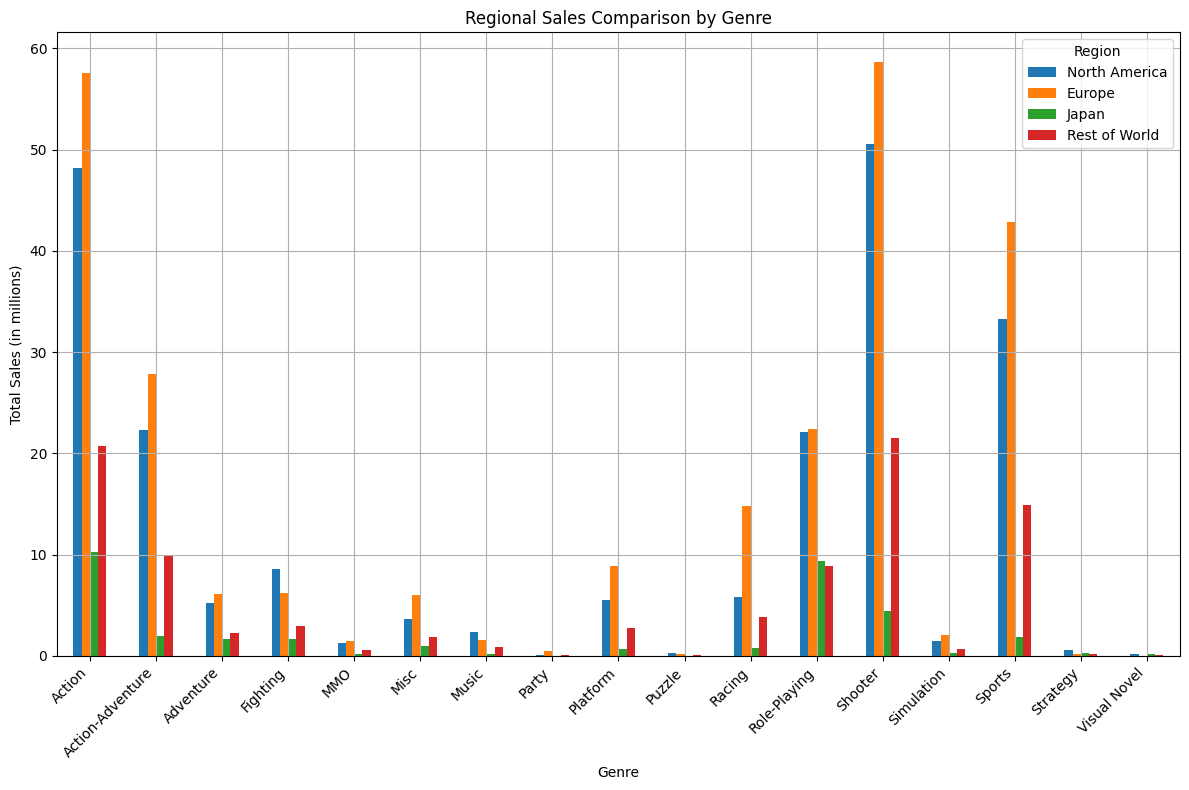

In [95]:
region_sales_by_genre = df.groupby('Genre')[['North America', 'Europe', 'Japan', 'Rest of World']].sum()

region_sales_by_genre.plot(kind='bar', stacked=False, figsize=(12, 8))

plt.title('Regional Sales Comparison by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Region')
plt.grid(True)
plt.tight_layout()
plt.show()

In [127]:
print("""In Europe, the Action and Shooter genres have the highest sales, totaling about 58 million. This shows that these genres are very popular in the region, with gamers favoring fast-paced and competitive games. This trend suggests opportunities for developers to focus on these genres for the European market.""")

In Europe, the Action and Shooter genres have the highest sales, totaling about 58 million. This shows that these genres are very popular in the region, with gamers favoring fast-paced and competitive games. This trend suggests opportunities for developers to focus on these genres for the European market.


# Find the publisher with the highest total global sales.

In [57]:
top_publisher = df.sort_values(by='Global', ascending = False).head(3)
top_publisher

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94


In [61]:
print(top_publisher[['Publisher','Global']])

        Publisher  Global
0  Rockstar Games   19.39
1      Activision   15.09
2  Rockstar Games   13.94


In [63]:
print("""1. Rockstar Games dominates with Grand Theft Auto V (19.39M) and Red Dead Redemption 2 (13.94M), totaling 33.33M units globally.  
2. Activision follows with 15.09M units for Call of Duty: Black Ops 3.  
3. Rockstar’s consistent success highlights its dominance in the gaming industry.""")

1. Rockstar Games dominates with Grand Theft Auto V (19.39M) and Red Dead Redemption 2 (13.94M), totaling 33.33M units globally.  
2. Activision follows with 15.09M units for Call of Duty: Black Ops 3.  
3. Rockstar’s consistent success highlights its dominance in the gaming industry.


# Analyze the year with the highest number of game releases.


In [94]:
games_per_year = df['Year'].value_counts()
year_highest_releases = games_per_year.idxmax()
highest_releases = games_per_year.max()
print(f"The year with the highest number of game releases is {year_highest_releases} with {highest_releases} game(s).")

The year with the highest number of game releases is 2017.0 with 254 game(s).


#  Determine the most popular genre globally based on total sales

In [91]:
genre_sales = df.groupby('Genre')['Global'].sum()
higest_genre = genre_sales.idxmax()
highest_sales = genre_sales.max()
print(f"The most popular genre globally is '{higest_genre}' with total sales of {highest_sales} million units.")


The most popular genre globally is 'Action' with total sales of 136.85 million units.


# Identify the game with the highest sales in Japan compared to other regions

In [81]:
game_highest_sales_japan = df.loc[df['Japan'].idxmax()]
game_highest_sales_japan_info = game_highest_sales_japan[['Game', 'Japan', 'North America', 'Europe', 'Rest of World']]
print(game_highest_sales_japan_info)

Game             Monster Hunter: World
Japan                             2.17
North America                     1.03
Europe                            1.06
Rest of World                     0.42
Name: 24, dtype: object


In [134]:
print("""Monster Hunter World has the highest sales in Japan, with 2.17 million units, followed by North America (1.03 million) and Europe (1.06 million). The game is particularly popular in Japan, indicating strong local appeal, while it also performs well in Western markets, though with lower sales compared to Japan.""")

Monster Hunter World has the highest sales in Japan, with 2.17 million units, followed by North America (1.03 million) and Europe (1.06 million). The game is particularly popular in Japan, indicating strong local appeal, while it also performs well in Western markets, though with lower sales compared to Japan.


# Examine if there is a correlation between sales in North America and Europe.

In [79]:
correlation = df['North America'].corr(df['Europe'])
correlation_rounded = round(correlation, 2)
print(f"Correlation between North America and Europe sales: {correlation_rounded}")

Correlation between North America and Europe sales: 0.82


# Compare the sales growth trend for "Action" and "Shooter" genres over the years.

In [71]:
filtered = df[df['Genre'].isin(['Action','Shooter'])]
filtered

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33
8,Call of Duty: Infinite Warfare,2016.0,Shooter,Activision,3.11,3.83,0.19,1.36,8.48
...,...,...,...,...,...,...,...,...,...
1025,Biomutant,2019.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00
1028,Code Vein,2018.0,Action,Bandai Namco Entertainment,0.00,0.00,0.00,0.00,0.00
1031,The Mummy Demastered,unknown,Action,unknown,0.00,0.00,0.00,0.00,0.00
1032,Project Nimbus: Code Mirai,unknown,Action,unknown,0.00,0.00,0.00,0.00,0.00


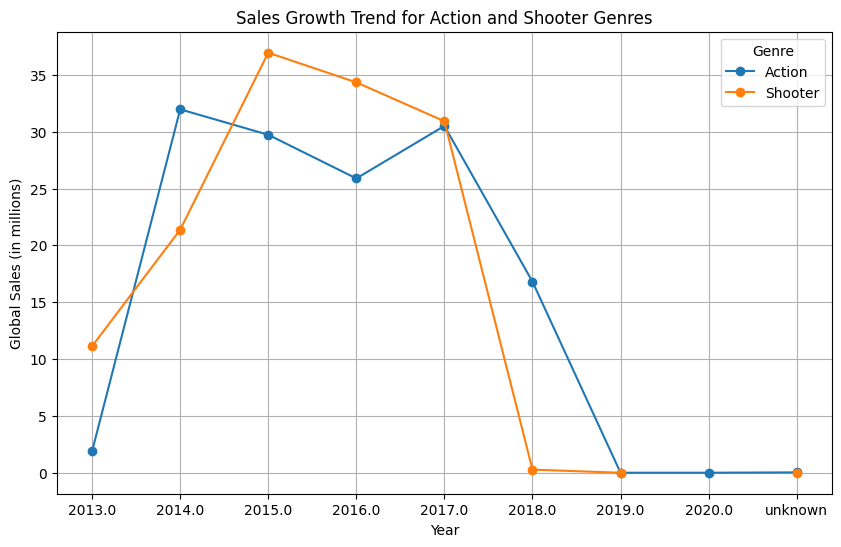

In [72]:
sales_trends = filtered.groupby(['Year', 'Genre'])['Global'].sum().reset_index()

sales_pivot = sales_trends.pivot(index='Year', columns='Genre', values='Global')

sales_pivot.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Sales Growth Trend for Action and Shooter Genres')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.legend(title='Genre')
plt.grid()
plt.show()


In [136]:
print("""The Action genre saw a peak in sales in 2015 at 33 million, then dropped to 26 million in 2016, before rising again to 31 million in 2017. On the other hand, the Shooter genre had its highest sales in 2015 at 37 million, but then saw a decline to 31 million in 2017. Notably, Action and Shooter games had no sales in 2018, 2019, or 2020, indicating a sharp decline in popularity during those years.""")

The Action genre saw a peak in sales in 2015 at 33 million, then dropped to 26 million in 2016, before rising again to 31 million in 2017. On the other hand, the Shooter genre had its highest sales in 2015 at 37 million, but then saw a decline to 31 million in 2017. Notably, Action and Shooter games had no sales in 2018, 2019, or 2020, indicating a sharp decline in popularity during those years.


#  Identify the top publisher in terms of sales for each region.

In [65]:
region_sales = df.groupby('Publisher')[['North America', 'Europe', 'Japan', 'Rest of World']].sum()
top_publishers = region_sales.idxmax()
print(top_publishers)

North America     Activision
Europe            Activision
Japan            Square Enix
Rest of World     Activision
dtype: object


# Visualize the distribution of global sales to identify patterns and outliers.

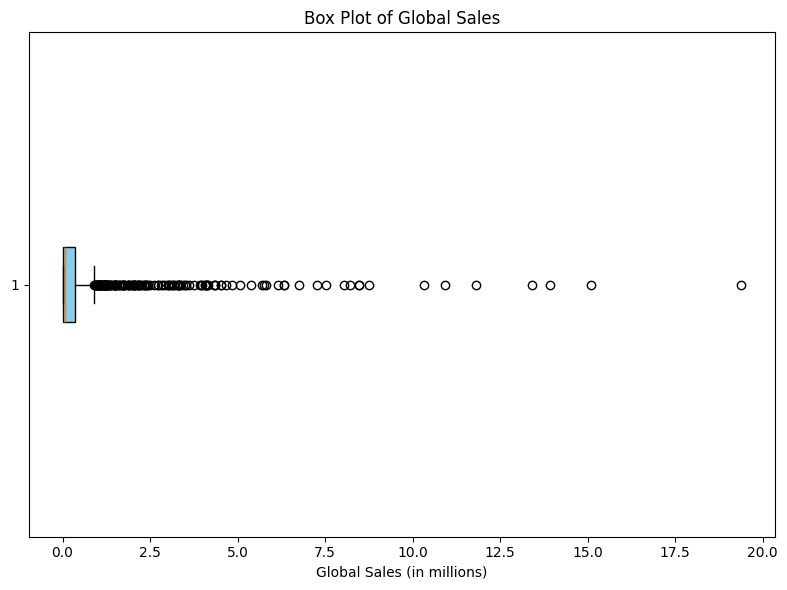

In [97]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Global'], vert=False, patch_artist=True, boxprops=dict(facecolor="skyblue", color="black"))
plt.title('Box Plot of Global Sales')
plt.xlabel('Global Sales (in millions)')
plt.tight_layout()
plt.show()


 # Create visualizations to better understand and communicate data insights:

# Distribution of global sales (histogram).

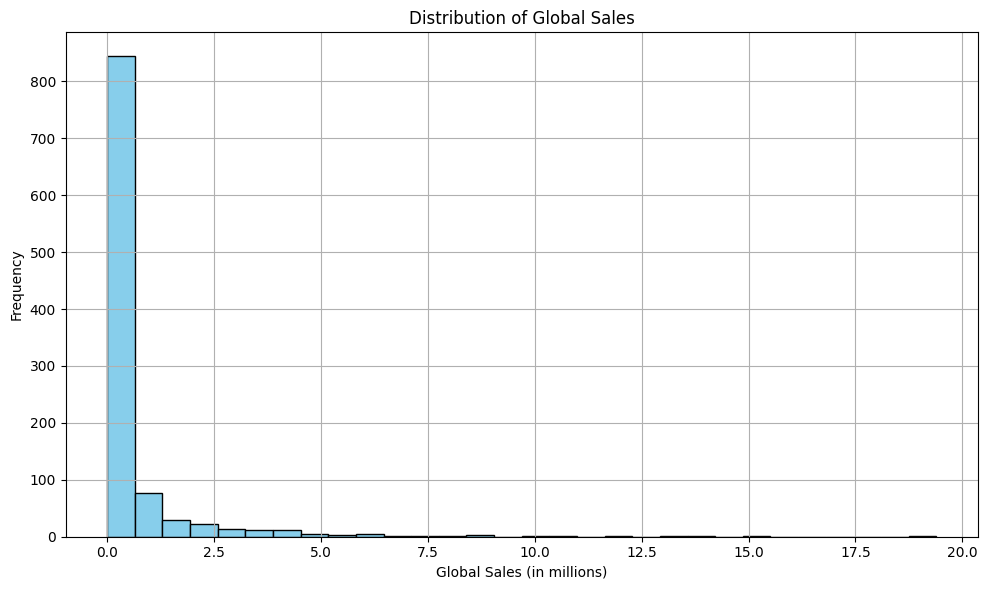

In [98]:
plt.figure(figsize=(10, 6))
plt.hist(df['Global'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Global Sales')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


# Total sales comparison for regions (bar chart).

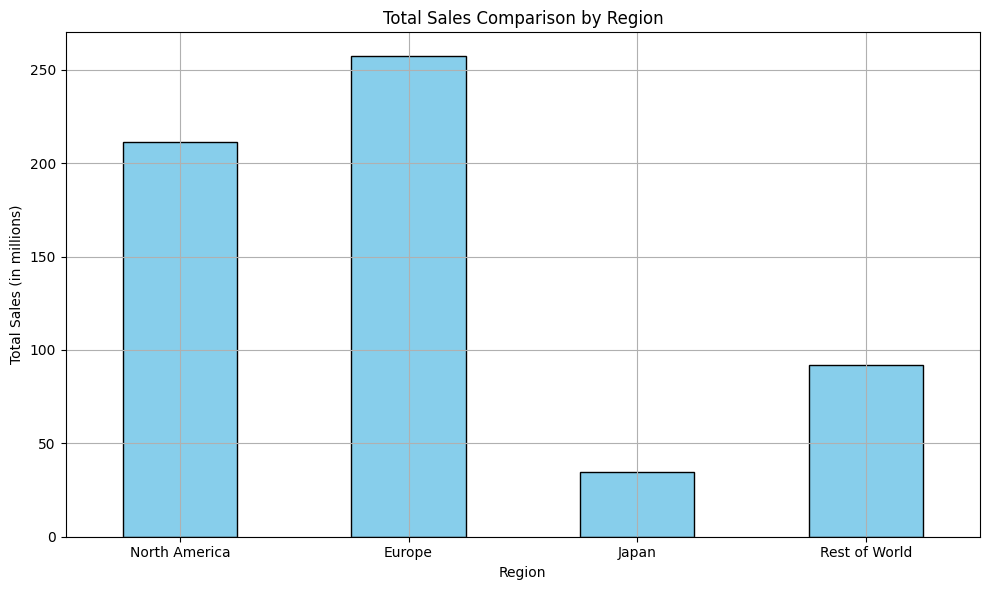

In [125]:
region_sales = df[['North America', 'Europe', 'Japan', 'Rest of World']].sum()

plt.figure(figsize=(10, 6))
region_sales.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Total Sales Comparison by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

In [137]:
print("""Europe has the highest sales among all regions, with a total of approximately 260 million. This indicates that European gamers have a strong preference for the games in the dataset, contributing the most to global sales compared to other regions.""")

Europe has the highest sales among all regions, with a total of approximately 260 million. This indicates that European gamers have a strong preference for the games in the dataset, contributing the most to global sales compared to other regions.


# Share of total global sales by genre (pie chart).

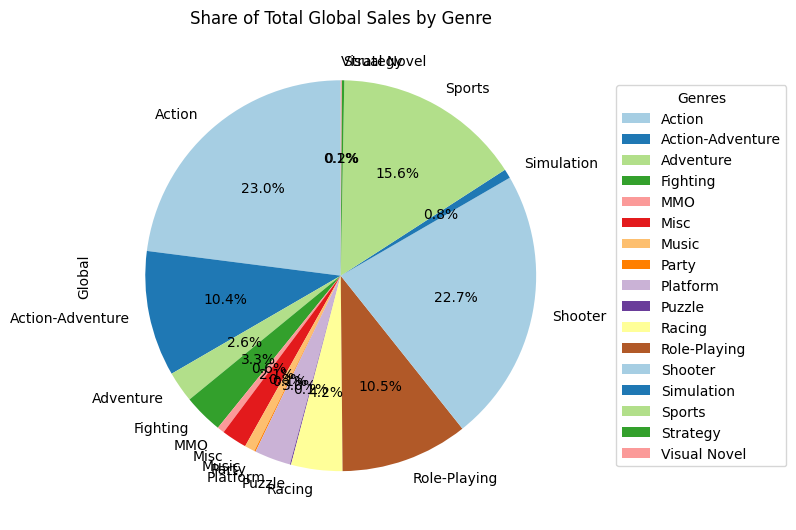

In [121]:
# Group by Genre and sum the global sales
genre_sales = df.groupby('Genre')['Global'].sum()

# Plot the pie chart
plt.figure(figsize=(8, 8))
ax = genre_sales.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors, startangle=90, legend=False, label= None)

# Title and other adjustments
plt.title('Share of Total Global Sales by Genre')
#plt.ylabel('')  # Hide the y-axis label

# Adjust the legend to be outside the plot
plt.legend(genre_sales.index, title="Genres", bbox_to_anchor=(1.05, 0.5), loc='center left' )

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()


In [139]:
print("""In the pie chart, the Action genre holds a share of 2.3% of the total global sales. This suggests that while it is a significant genre, it still represents a smaller portion of the overall market, indicating that other genres might dominate global sales.""")

In the pie chart, the Action genre holds a share of 2.3% of the total global sales. This suggests that while it is a significant genre, it still represents a smaller portion of the overall market, indicating that other genres might dominate global sales.


# Trend of global sales over the years (line chart).

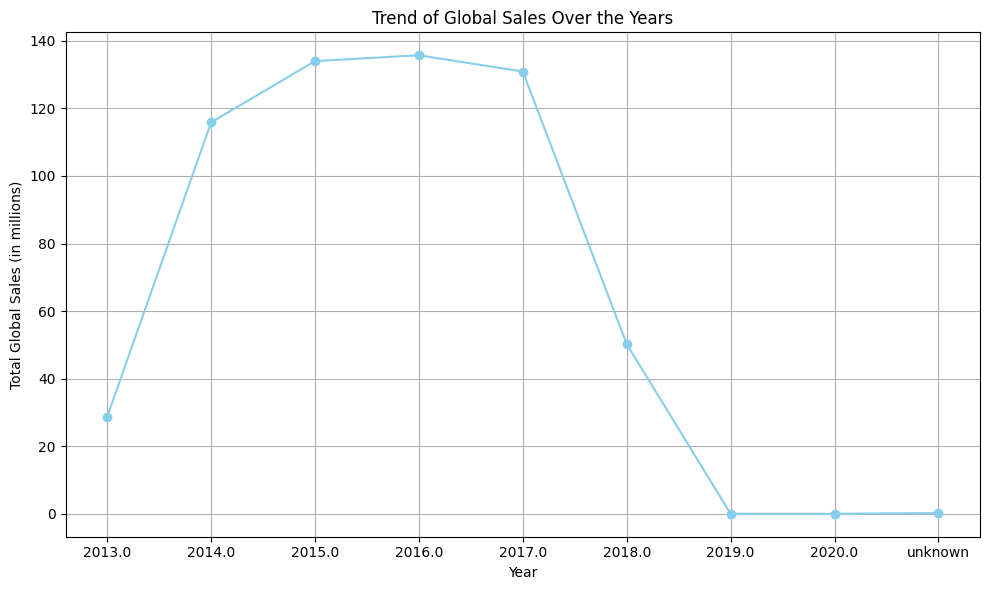

In [104]:
sales_trend = df.groupby('Year')['Global'].sum()

plt.figure(figsize=(10, 6))
sales_trend.plot(kind='line', marker='o', color='skyblue')
plt.title('Trend of Global Sales Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Global Sales (in millions)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [140]:
print("Sales rate are high in 2015,2016, 2017 and no sale in the year of 2019 and 2020")

Sales rate are high in 2015,2016, 2017 and no sale in the year of 2019 and 2020


# Top 10 best-selling games globally (horizontal bar chart).

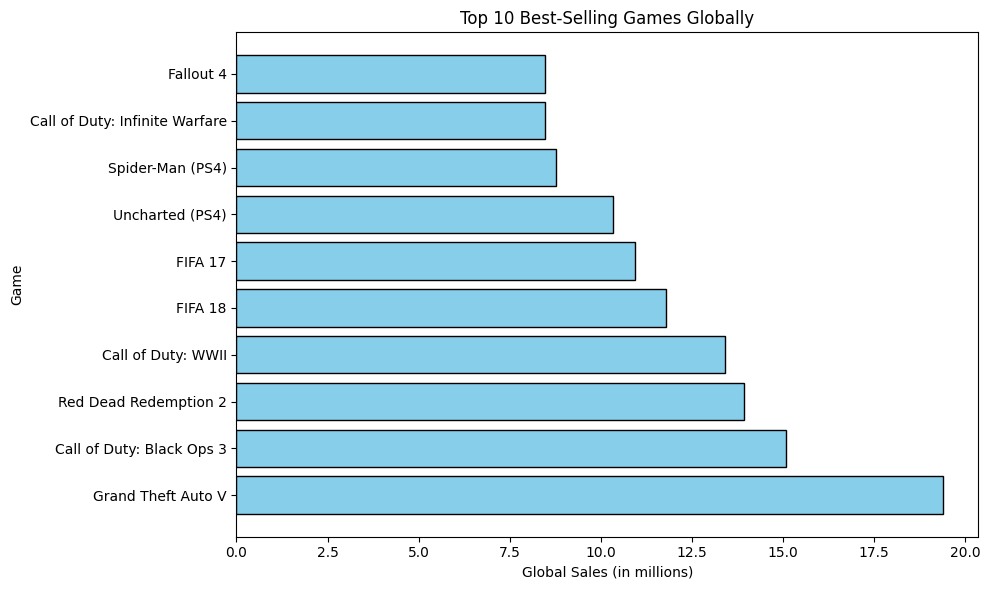

In [105]:
top_10_games = df.sort_values('Global', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_10_games['Game'], top_10_games['Global'], color='skyblue', edgecolor='black')
plt.title('Top 10 Best-Selling Games Globally')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Game')
plt.tight_layout()
plt.show()

In [141]:
print("""Grand Theft Auto V is the highest-selling game, with 19.39 million units sold globally.""")

Grand Theft Auto V is the highest-selling game, with 19.39 million units sold globally.


# Correlation between regional sales (heatmap).

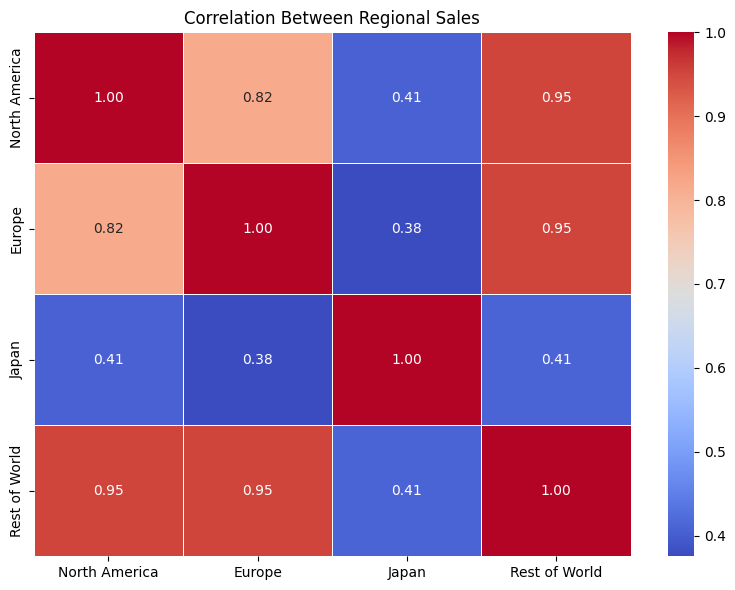

In [106]:
regional_sales = df[['North America', 'Europe', 'Japan', 'Rest of World']]

correlation_matrix = regional_sales.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between Regional Sales')
plt.tight_layout()
plt.show()

North America and Europe show a strong positive correlation, indicating that sales trends in these regions are closely aligned. Japan appears to have a weaker correlation with other regions, suggesting that game preferences in Japan may differ from those in North America, Europe, and the Rest of the World. The Rest of World region shows moderate correlations with North America and Europe, indicating some alignment in sales but also highlighting regional differences

# Contribution of each genre to regional sales (stacked bar chart).

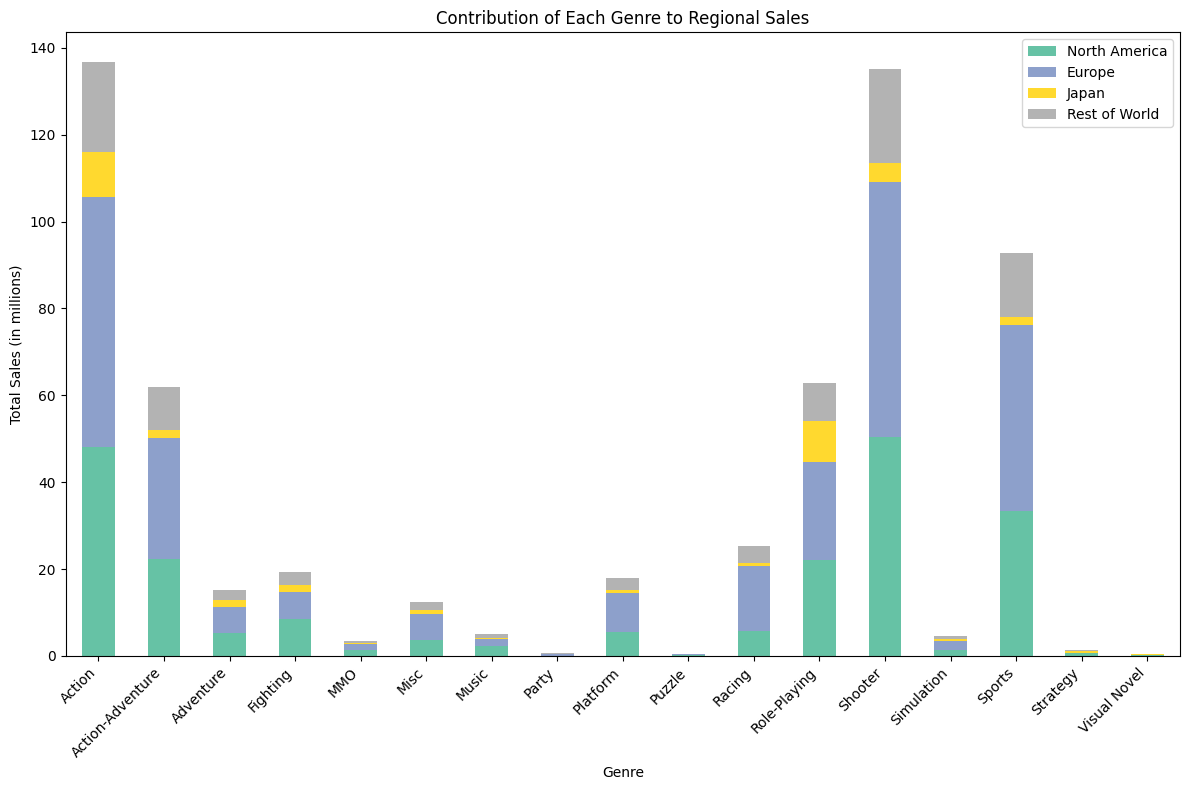

In [123]:
regional_sales_by_genre = df.groupby('Genre')[['North America', 'Europe', 'Japan', 'Rest of World']].sum()

regional_sales_by_genre.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='Set2')

plt.title('Contribution of Each Genre to Regional Sales')
plt.xlabel('Genre')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Please write about the following answer after complete this project:


1. **What insights or patterns did you discover during your analysis?**  
   I discovered several key patterns, such as the dominance of specific genres like **Action** and **Shooter** in regional markets, particularly in **Europe**. Additionally, I observed that **Grand Theft Auto V** is the best-selling game globally, and **Monster Hunter: World** performed exceptionally well in Japan compared to other regions. Regional preferences, correlations, and sales trends highlighted distinct consumer behavior across markets.

2. **Did anything in the data surprise you? If yes, what was it?**  
   Yes, I was surprised to see that **Shooter** games had no sales recorded for **2018, 2019, and 2020**, despite their strong performance in earlier years. This suggests a potential shift in consumer interest or a gap in game releases during those years. Additionally, the strong correlation between sales in **North America** and **Europe** highlighted how these regions share similar gaming trends.

3. **What challenges did you face, and how did you overcome them?**  
   One challenge was dealing with overlapping labels in visualizations like pie charts, which made the charts difficult to read. I resolved this by adjusting label distances, legends, and overall layout. Another challenge was interpreting and visualizing regional trends effectively, which I overcame by using clear, structured graphs like stacked bar charts and heatmaps. Handling missing or surprising data points, like the lack of Shooter sales in specific years, required careful analysis to avoid misinterpretation.

4. **How do you think data analysis can help in making real-world decisions?**  
   Data analysis provides actionable insights, such as identifying popular genres and regional preferences, which can guide game developers and marketers in tailoring their strategies. For instance, focusing on high-demand genres in specific regions or understanding market gaps can significantly enhance decision-making, resource allocation, and revenue generation.

5. **What skills or knowledge do you feel you have improved during this project?**  
   Through this project, I improved my skills in data visualization, particularly in creating insightful charts like heatmaps, pie charts, and stacked bar charts. I also enhanced my ability to interpret sales trends and correlations effectively. Additionally, I gained a deeper understanding of how to present findings concisely and derive meaningful insights from raw data.